# Mean Encoding

Mean Encoding or Target Encoding is one viral encoding approach followed by Kagglers. There are many variations of this. Here I will cover the basic version and smoothing version. Mean encoding is similar to label encoding, except here labels are correlated directly with the target. For example, in mean target encoding for each category in the feature label is decided with the mean value of the target variable on a training data. This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself. The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. Usually, Mean encoding is notorious for over-fitting; thus, a regularization with cross-validation or some other approach is a must on most occasions. Mean encoding approach is as below:

Select a categorical variable you would like to transform<br>Group by the categorical variable and obtain aggregated sum over the “Target” variable. (total number of 1’s for each category in ‘Temperature’)<br>Group by the categorical variable and obtain aggregated count over “Target” variable<br>Divide the step 2 / step 3 results and join it back with the train.
<br>

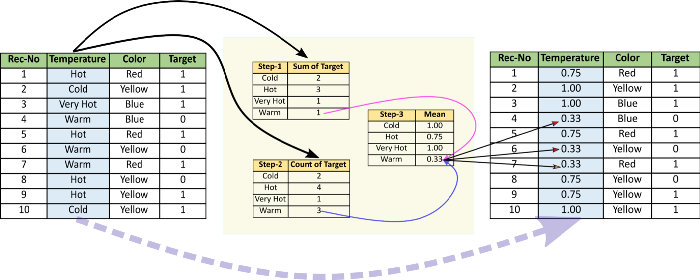

import pandas as pd

In [2]:
data = { 'Temperature' : ['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
         'Color' : ['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
         'Target' : [1,1,1,0,1,0,1,0,1,1] }
df = pd.DataFrame(data, columns = ['Temperature','Color','Target'])

In [5]:
mean_encode = df.groupby('Temperature')['Target'].mean()
print(mean_encode)
df.loc[:, 'Temperature_mean_enc'] = df['Temperature'].map(mean_encode)
df

Temperature
Cold        1.000000
Hot         0.750000
Very Hot    1.000000
Warm        0.333333
Name: Target, dtype: float64


,Temperature,Color,Target,Temperature_mean_enc
0,Hot,Red,1,0.750000
1,Cold,Yellow,1,1.000000
2,Very Hot,Blue,1,1.000000
3,Warm,Blue,0,0.333333
4,Hot,Red,1,0.750000
5,Warm,Yellow,0,0.333333
6,Warm,Red,1,0.333333
7,Hot,Yellow,0,0.750000
8,Hot,Yellow,1,0.750000
9,Cold,Yellow,1,1.000000


Mean encoding can embody the target in the label, whereas label encoding does not correlate with the target. In the case of a large number of features, mean encoding could prove to be a much simpler alternative. Mean encoding tends to group the classes, whereas the grouping is random in case of label encoding.<br><br>
There are many variations of this target encoding in practice, like smoothing. Smoothing can implement as below:
<br>

In [8]:
# compute the global mean
mean = df['Target'].mean()
# compute the number of values and the mean of each group
agg = df.groupby('Temperature')['Target'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight = 100
# compute the 'smoothed' means
smooth = (counts * mean + weight * mean)/(counts + weight)
# replace each value by the according smoothed mean
print(smooth)
df.loc[:, 'Temperature_smean_enc'] = df['Temperature'].map(smooth)
df

Temperature
Cold        0.7
Hot         0.7
Very Hot    0.7
Warm        0.7
Name: count, dtype: float64


,Temperature,Color,Target,Temperature_mean_enc,Temperature_smean_enc
0,Hot,Red,1,0.750000,0.7
1,Cold,Yellow,1,1.000000,0.7
2,Very Hot,Blue,1,1.000000,0.7
3,Warm,Blue,0,0.333333,0.7
4,Hot,Red,1,0.750000,0.7
5,Warm,Yellow,0,0.333333,0.7
6,Warm,Red,1,0.333333,0.7
7,Hot,Yellow,0,0.750000,0.7
8,Hot,Yellow,1,0.750000,0.7
9,Cold,Yellow,1,1.000000,0.7
